# Numerical approach of getting the shape of B(T)

The $(12-6)$ potential is of form
\begin{equation}
U_{12}=U_*\left[\left(\frac{d_*}{r}\right)^{12}-\left(\frac{d_*}{r}\right)^{6}\right],
\end{equation}
where we let $U_*=200K, d_*=10^{-8} cm$.
\
The second virial coefficient:
\begin{equation}
B(T)=2\pi\int_0^\infty \left(1-e^{-\frac{U_{12}(r)}{T}}\right)r^2 \,\mathrm{d}r.
\end{equation}
To make the B(T) plot readable introduce the following "reduced" notation:
\begin{equation}
B_*(T)=\frac{B(T)}{{d_*}^3}, \:\:\:\: T_*=\frac{4T}{U_*}.
\end{equation}
\
Note that $B_*$ and $T_*$ are both dimentionless.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate

In [54]:
def U_LJ(r, U_, d_):
    return U_ * ((d_/r)**12 - (d_/r)**6)

In [55]:
U_ = 200 #K
d_ = 1e-8 #sm

In [90]:
r0, r1 = 9e-9, 3e-8
r = np.linspace(r0, r1, 100)
U = [U_LJ(el, U_, d_) for el in r]

In [108]:
def integrand(r, T):
    return 2*np.pi*(1-np.exp(-U_LJ(r, U_, d_)/T)) * r**2

In [109]:
def B(T):
    return scipy.integrate.quad(integrand, r0, r1, args=(T,))[0]

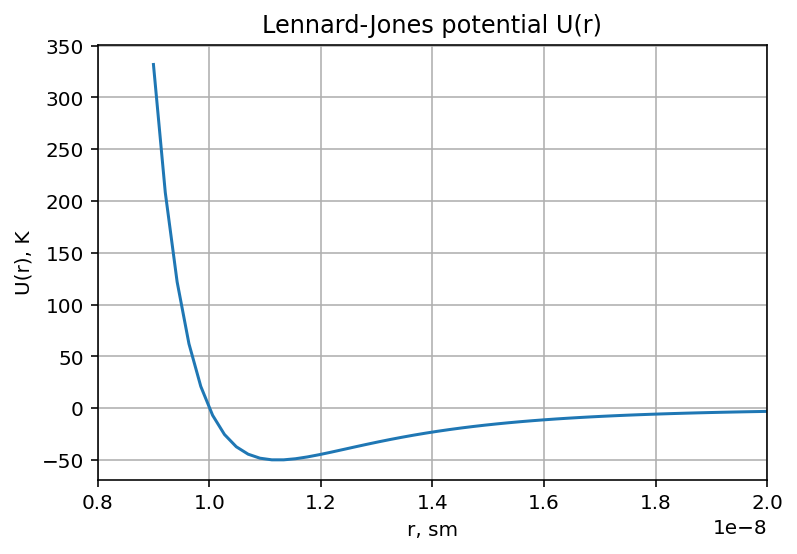

In [96]:
plt.plot(r, U)
plt.title('Lennard-Jones potential U(r)')
plt.xlabel("r, sm")
plt.ylabel("U(r), K")
plt.xlim([8e-9, 2e-8])
plt.grid()

### Integrating B(T)

In [111]:
T_val = np.linspace(15, 150, 100)
B_val = np.array([B(el) for el in T_val])

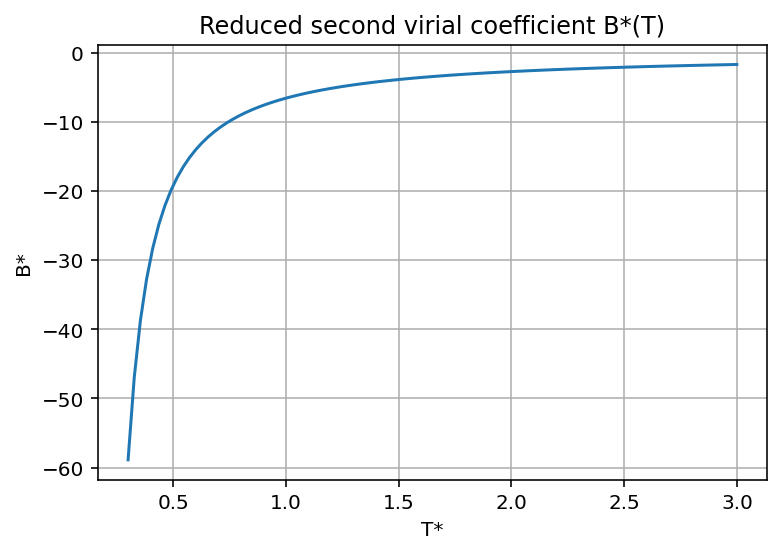

In [114]:
plt.plot(T_val /(U_/4), B_val * d_**(-3))
plt.title('Reduced second virial coefficient B*(T)')
plt.xlabel('T*')
plt.ylabel('B*')
plt.grid()